# 1Structure for the first exercise

In [1]:
#First exercise 
#Creating a structure of classes for reading further sensor data
class SensorParser:
    def __init__(self, raw_data):
        self.raw_data = raw_data
    def parse(self):
        raise NotImplementedError('Praising is not possible yet')
    def visualize(self):
        raise NotImplementedError('Visualization is not possible yet')
    
class LidarData(SensorParser):
    def parse(self):
        #reading lidar sensor data provided in csv files
        df = pd.read_csv('lidar_data.csv')
        return df
    def visualize(self):
        #visualizing lidar sensor data
        xyz = df[['Point_X', 'Point_Y', 'Point_Z']].values
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(xyz)
        
class SomeOtherData(SensorParser):
    def parse(self):
        #reading other kind of sensor data with other method
        return parsed_data
    def visualize(self):
        #visualizing the data using an appropriate visualization method
        

IndentationError: expected an indented block (2297884545.py, line 28)

**********************************************************************

# 2 Visualize the given point clouds, look for errors

In [2]:
import open3d as o3d
import pandas as pd
import numpy as np

#checking for errors/missing data in the provided csv files
df = pd.read_csv('hazi_feladat/hazi_feladat (Frame 0030).csv')
df_coordinates = df[['Point_X', 'Point_Y', 'Point_Z']]
print(df.dtypes)
print(df.isna().sum())
print(df.duplicated().sum())
print(df.isnull().sum())

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
print(outliers.sum())

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Points_m_XYZ:0    float64
Points_m_XYZ:1    float64
Points_m_XYZ:2    float64
intensity         float64
laser_id          float64
pitch             float64
yaw               float64
distance_m        float64
Point_X           float64
Point_Y           float64
Point_Z           float64
dtype: object
Points_m_XYZ:0    0
Points_m_XYZ:1    0
Points_m_XYZ:2    0
intensity         0
laser_id          0
pitch             0
yaw               0
distance_m        0
Point_X           0
Point_Y           0
Point_Z           0
dtype: int64
613
Points_m_XYZ:0    0
Points_m_XYZ:1    0
Points_m_XYZ:2    0
intensity         0
laser_id          0
pitch             0
yaw               0
distance_m        0
Point_X           0
Point_Y           0
Point_Z           0
dtype: int64
1239


Checking through the dataset I haven't found any missing data, 
however there are a number of outlier points of the point cloud

In [3]:
#here I visualize the provided point cloud without the outlier points
df_clean = df[~outliers]
xyz = df_clean[['Point_X', 'Point_Y', 'Point_Z']].values
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)
vis.get_render_option().point_size = 2
vis.get_view_control().rotate(20.0, 20.0)
vis.run()
vis.destroy_window()

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: A leíró érvénytelen. 


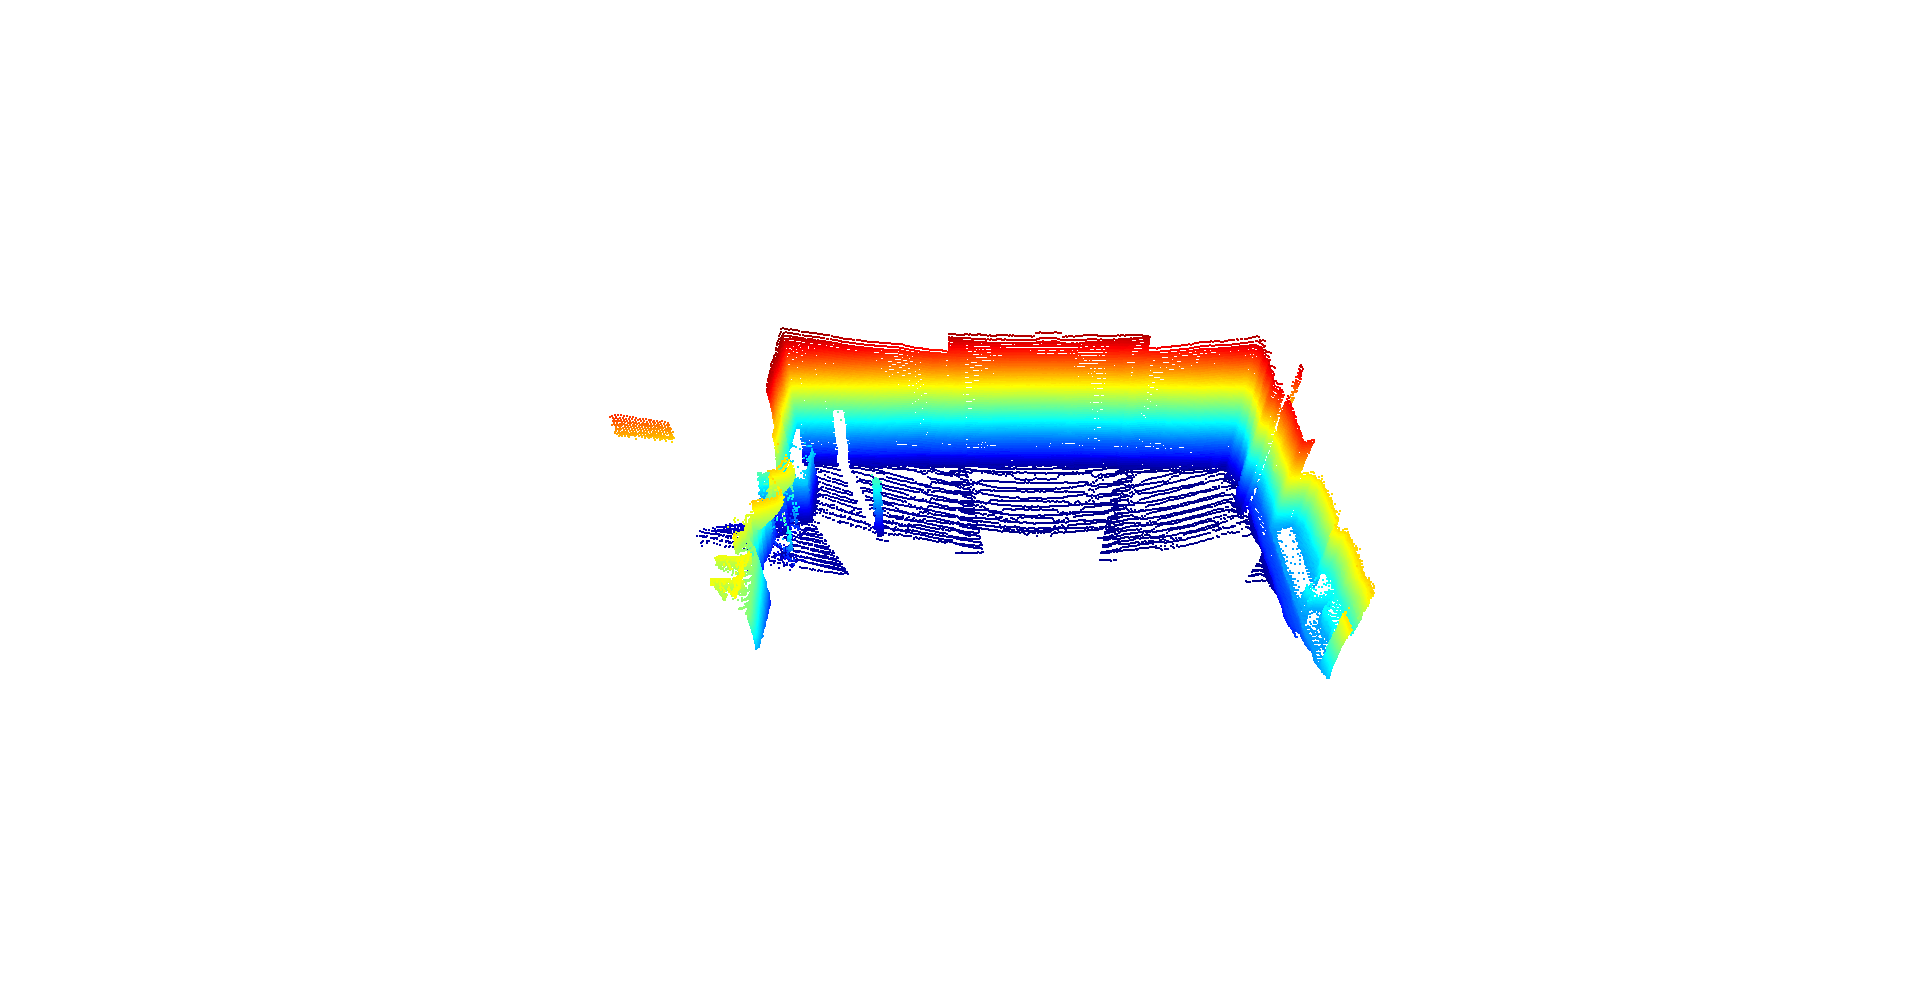

Image of pointcloud (0030) without the outlier values

In [4]:
#here I visualize the provided point cloud with the outlier points
xyz = df[['Point_X', 'Point_Y', 'Point_Z']].values
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)
vis.get_render_option().point_size = 2
vis.get_view_control().rotate(20.0, 20.0)
vis.run()
vis.destroy_window()

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: A leíró érvénytelen. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: A kért transzformációs művelet nem támogatott. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: A leíró érvénytelen. 


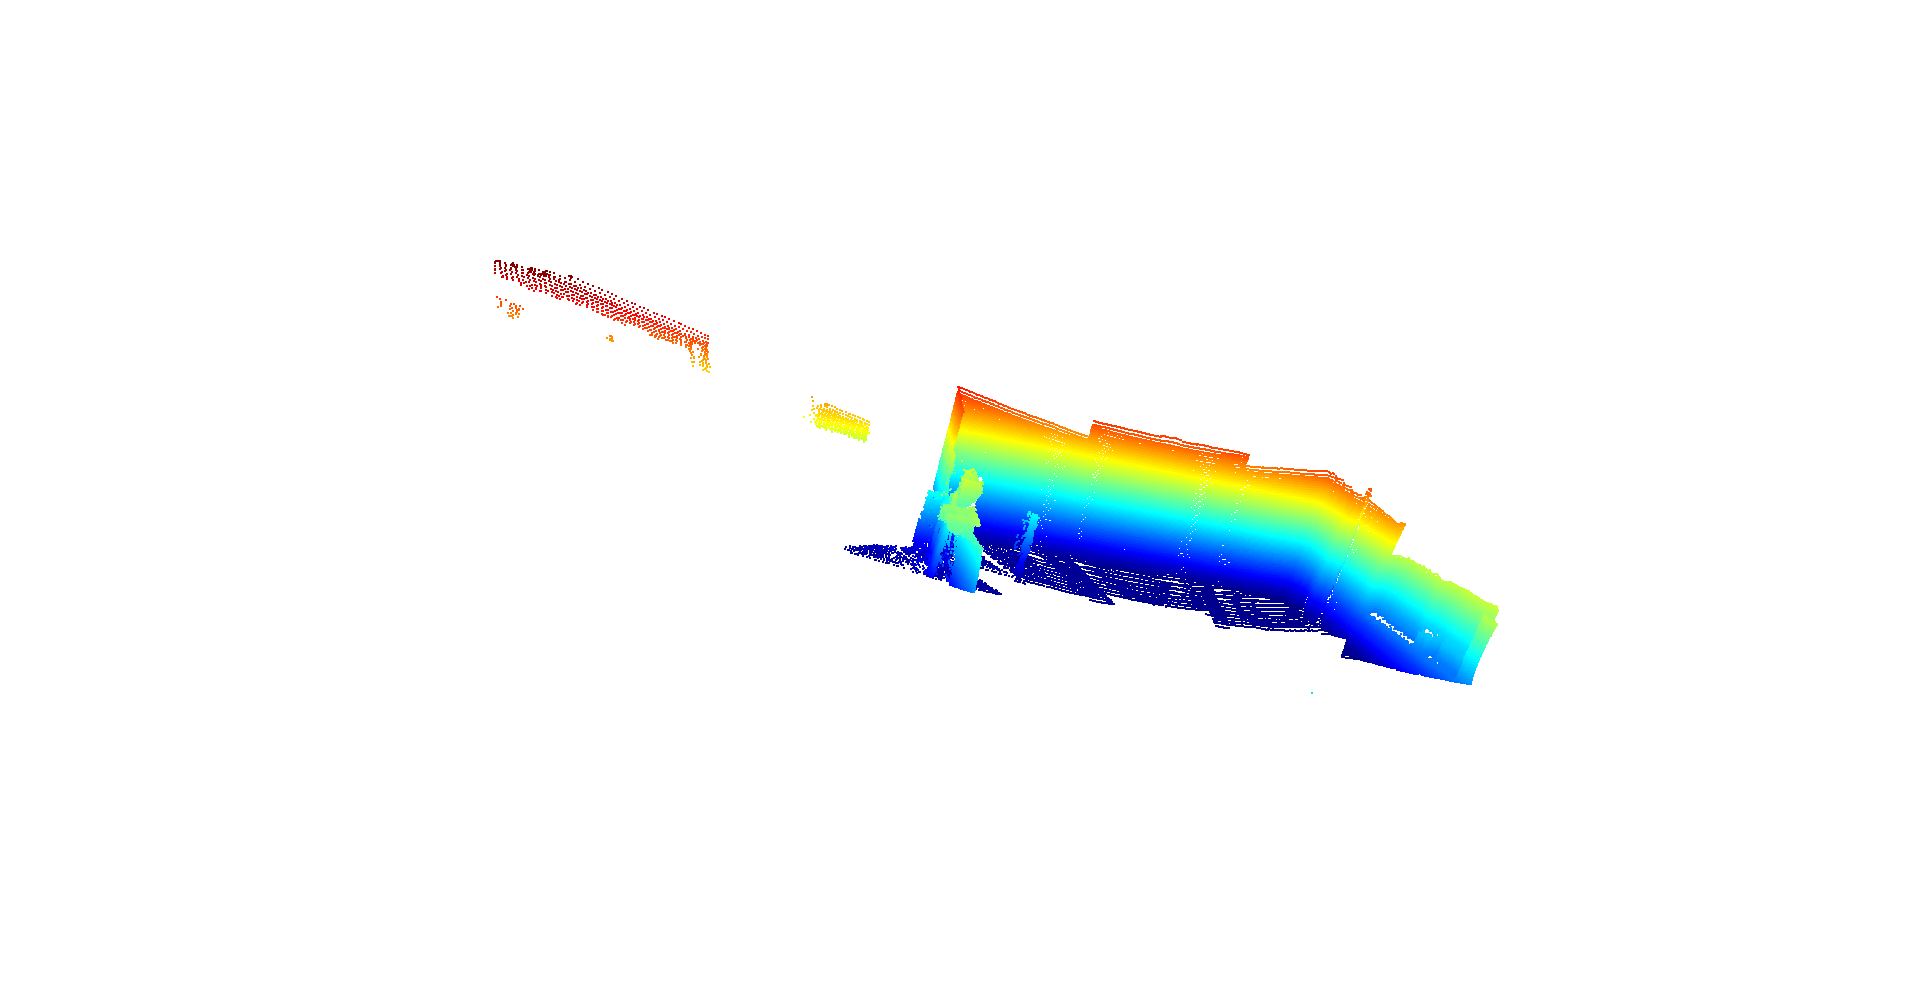
Image of point cloud with the outlier values.
What I clearly see and consider a sensor error are the bunch of points colored red
on the left hand side, and if we take a closer look we can see that several
depicted coordinate points "missed" the cardboard cylinder and detected a point behind the cylinder

In [5]:
df_outliers = df[outliers]
xyz = df_outliers[['Point_X', 'Point_Y', 'Point_Z']].values
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)
vis.get_render_option().point_size = 3
vis.get_view_control().rotate(20.0, 20.0)
vis.run()
vis.destroy_window()

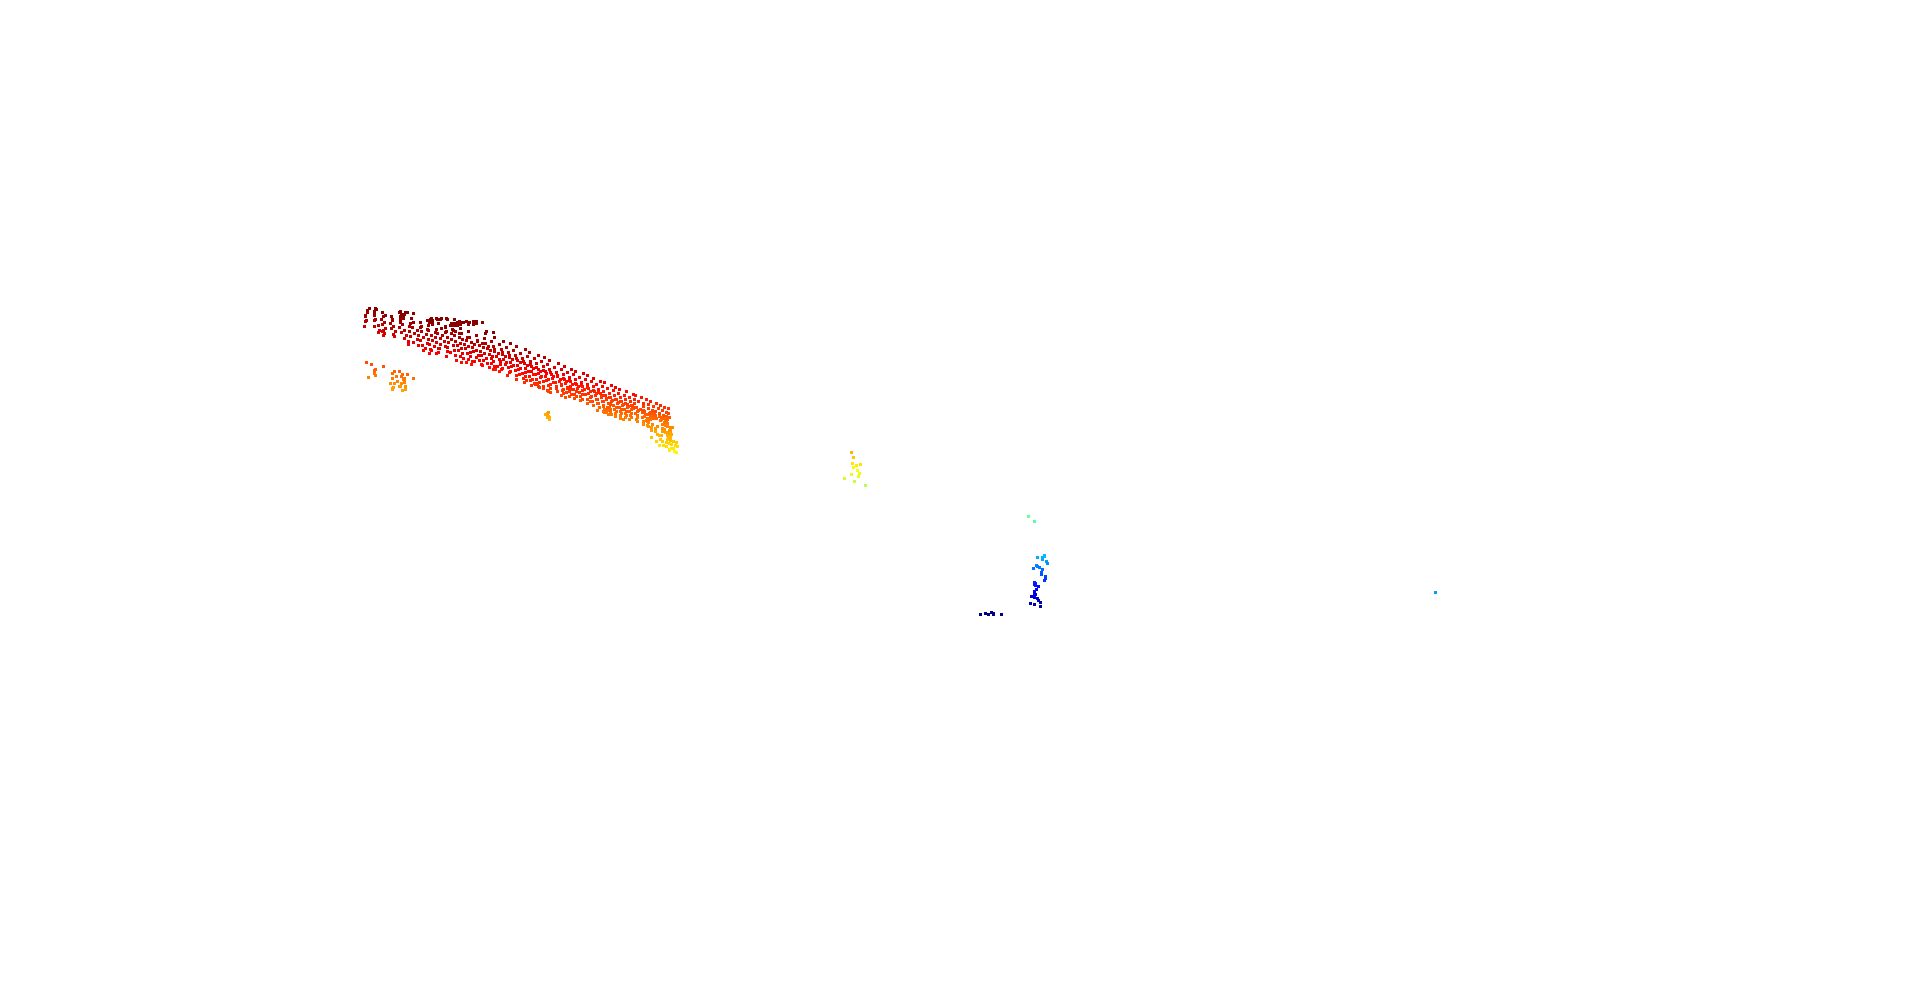
Here we can see the outlier points in 3D. It is easy to tell that several of misrecorded coordinates can be found around/behind the area where the cardboard cylinder is located. To me it looks like a misinterpretation of surroundings, aka an error commited by the lidar, however I have not used a sensor like that in real life, therefore I might be wrong.
Moreover another big pile of coordinate points are on the left hand side, to me they either belong to the curtain on the left hand side (visible on the life-picture of the room provided in the pdf document), or it is also a misinterpretation of the surrondings.

As of other errors, I have not found missing data while scanning through some of the .csv files.

*****************************************************

# 3 Select the wall off from the point cloud
For this exercise I simply looked into the X coordinates of the dataset and found that the wall
is about 6 meters away from the LiDAR. Therefore made a separate dataframe for the coordinates where the X value is between 5.9 and 6.1 meters, which gave me roughly the coordinates of the wall.

In [6]:
df_wall_coordinates = df[['Point_X', 'Point_Y', 'Point_Z']]
df_wall_coordinates = df_wall_coordinates[df['Point_X'] > 5.9]
df_wall_coordinates = df_wall_coordinates[df['Point_X'] < 6.1]


xyz = df_wall_coordinates[['Point_X', 'Point_Y', 'Point_Z']].values
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)

vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)
vis.get_render_option().point_size = 4
vis.run()

vis.destroy_window()

C:\Users\User\AppData\Local\Temp\ipykernel_20036\581514745.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_wall_coordinates = df_wall_coordinates[df['Point_X'] < 6.1]


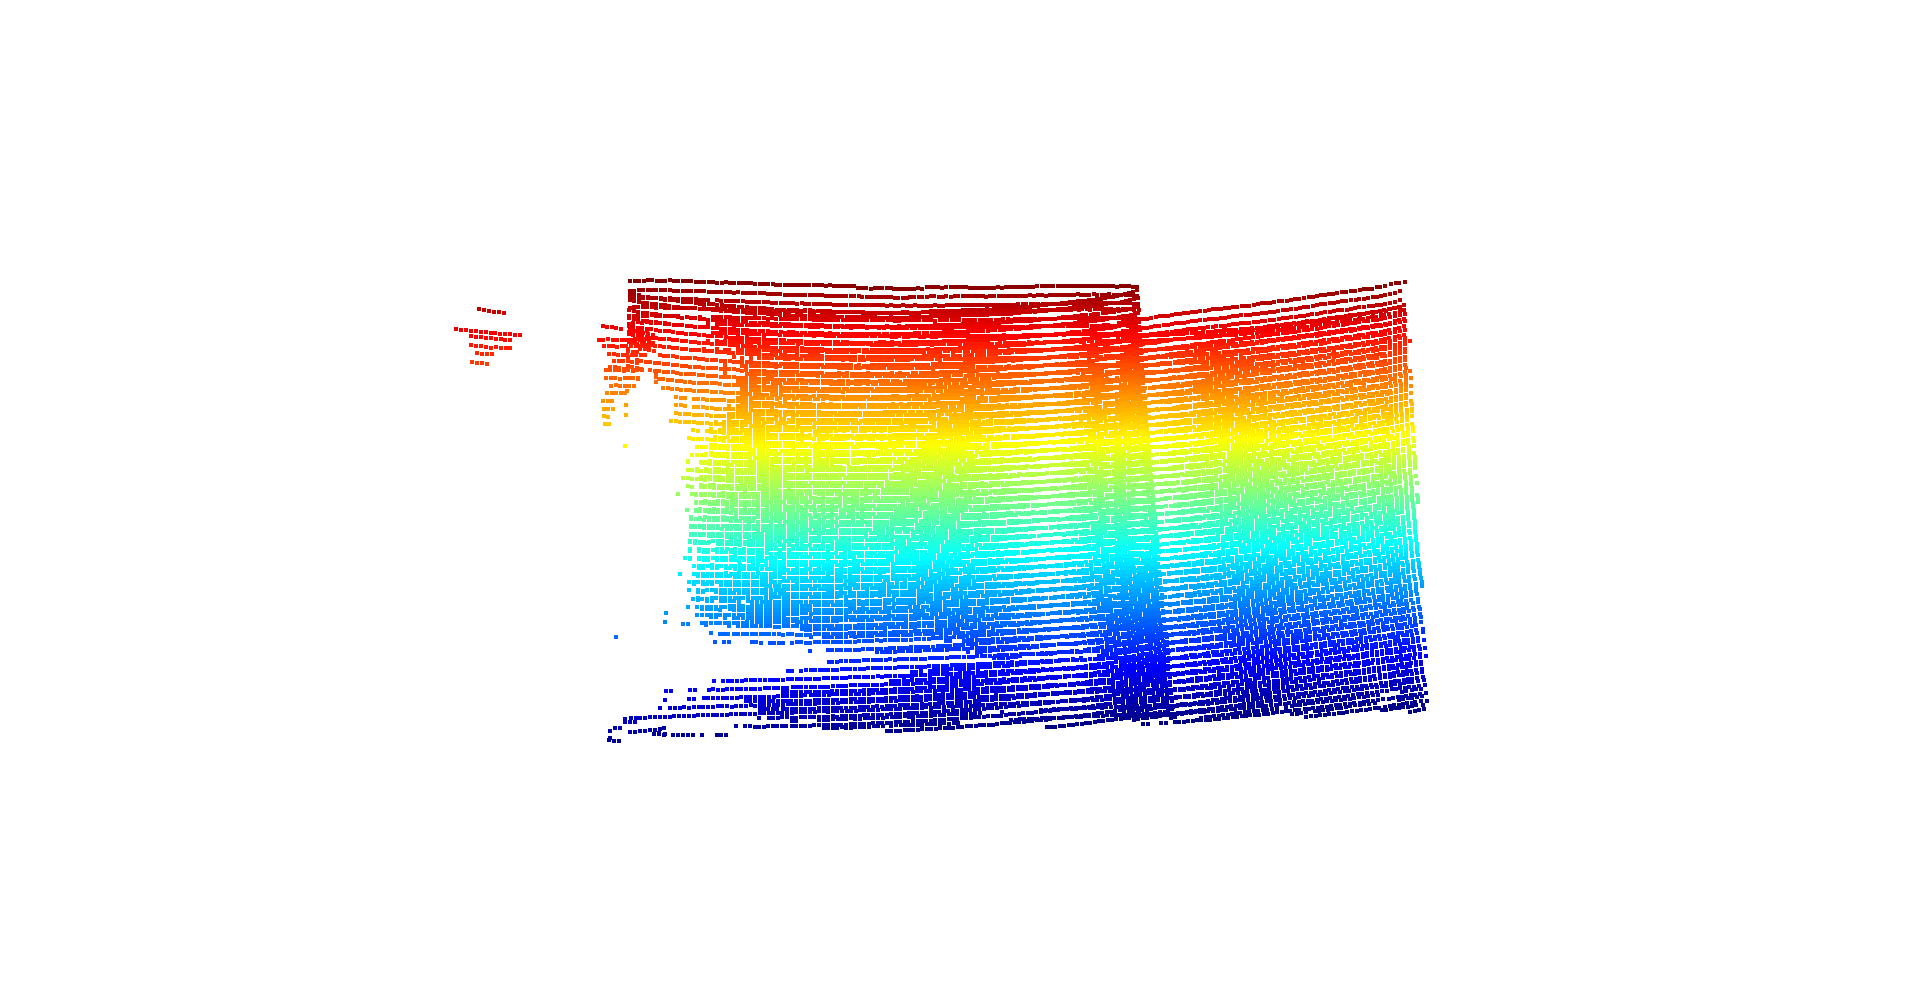
The first image depicts the selected point cloud where I estimated the wall between 5.9 and 6.1 meters. It is visible that there are several coordinates missing not only where the cardboard cylinder disrupts the sensor, but on the left side of the cylinder as well. To me it looks like the sensor detected the left side of the wall closer than the right side. 
In the next image I set the range down to 5.6
, in order to justify that the sensor detected the right side further away.

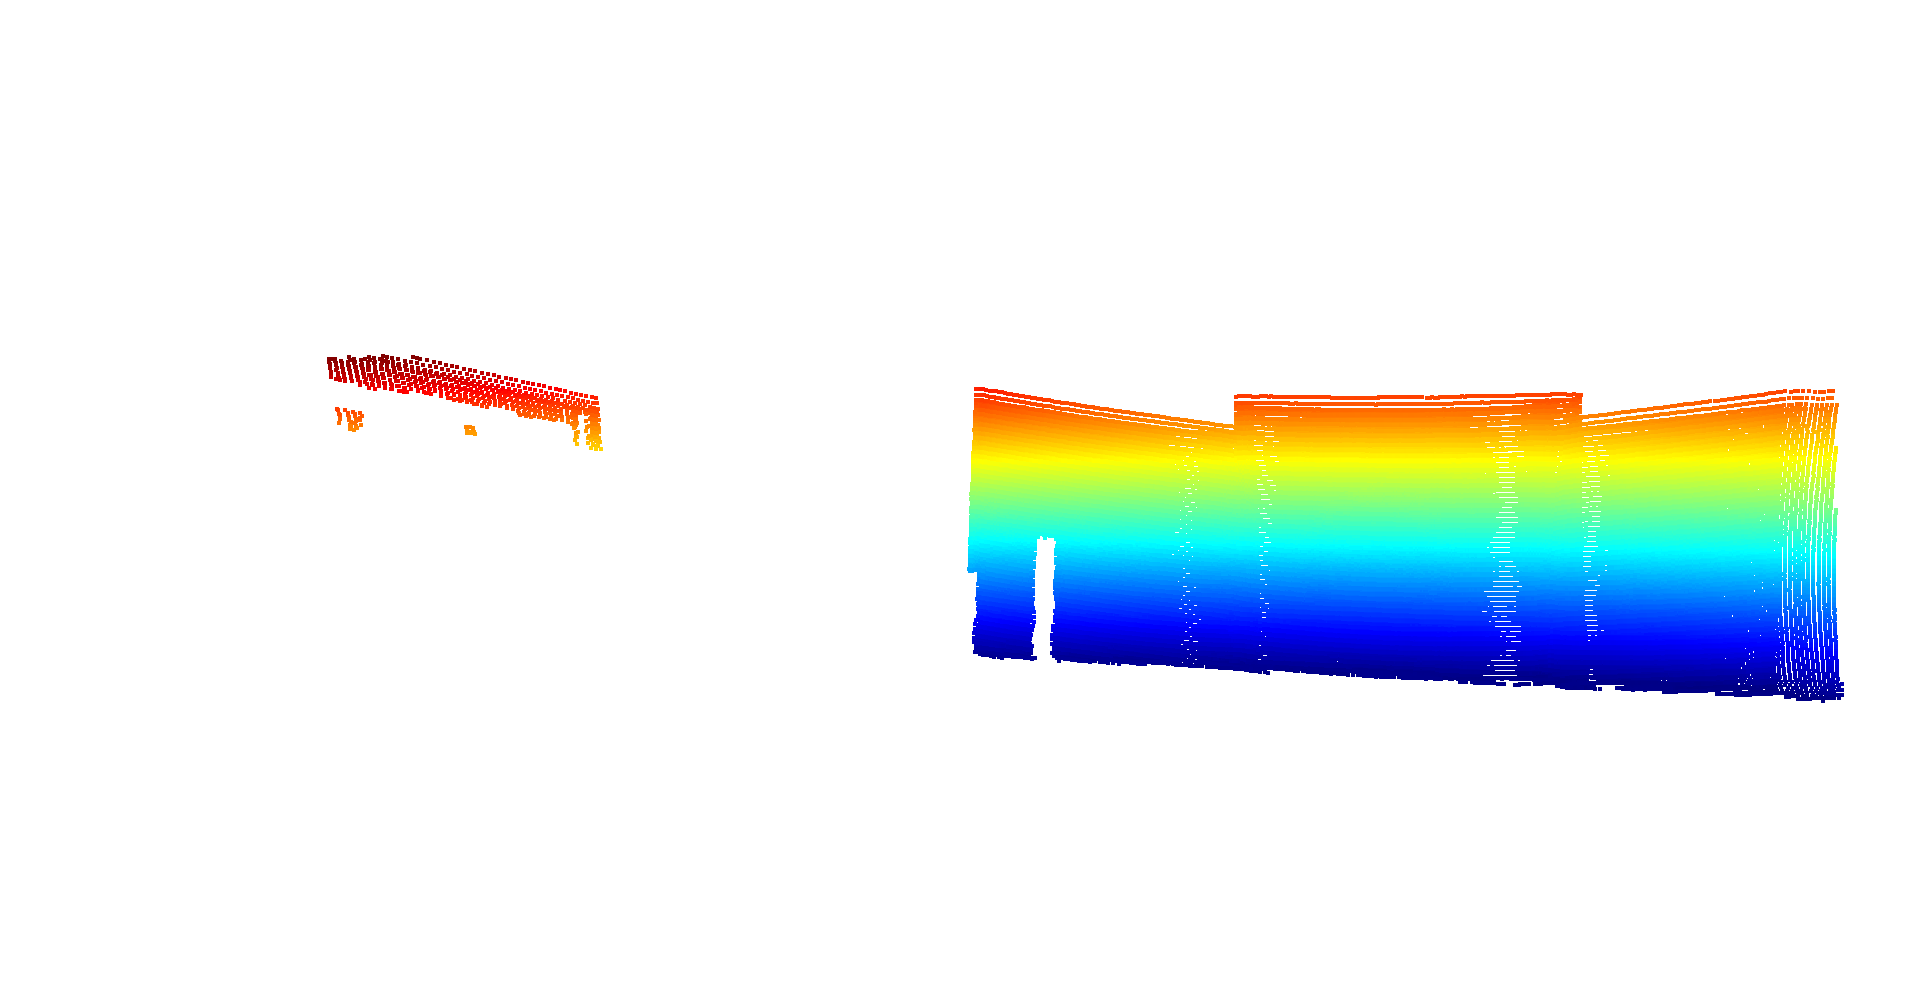
Visibly, with larger range, all the wall coordinates are shown. Therefore I assume, that the sensor detected the middle and right side of the wall being about 6 metres away, while the left side being only 5.6-5.9 metres away. If the sensor was facing directly to the wall and we assume that the wall is completely flat, I reckon this a rather serious misinterpretation by the sensor.

Moreover in the attached picture I highlighted the curve on the bottom of the wall, which in my opininion quite accurately depicts the raised bottom part of the wall, shown in the original picture.
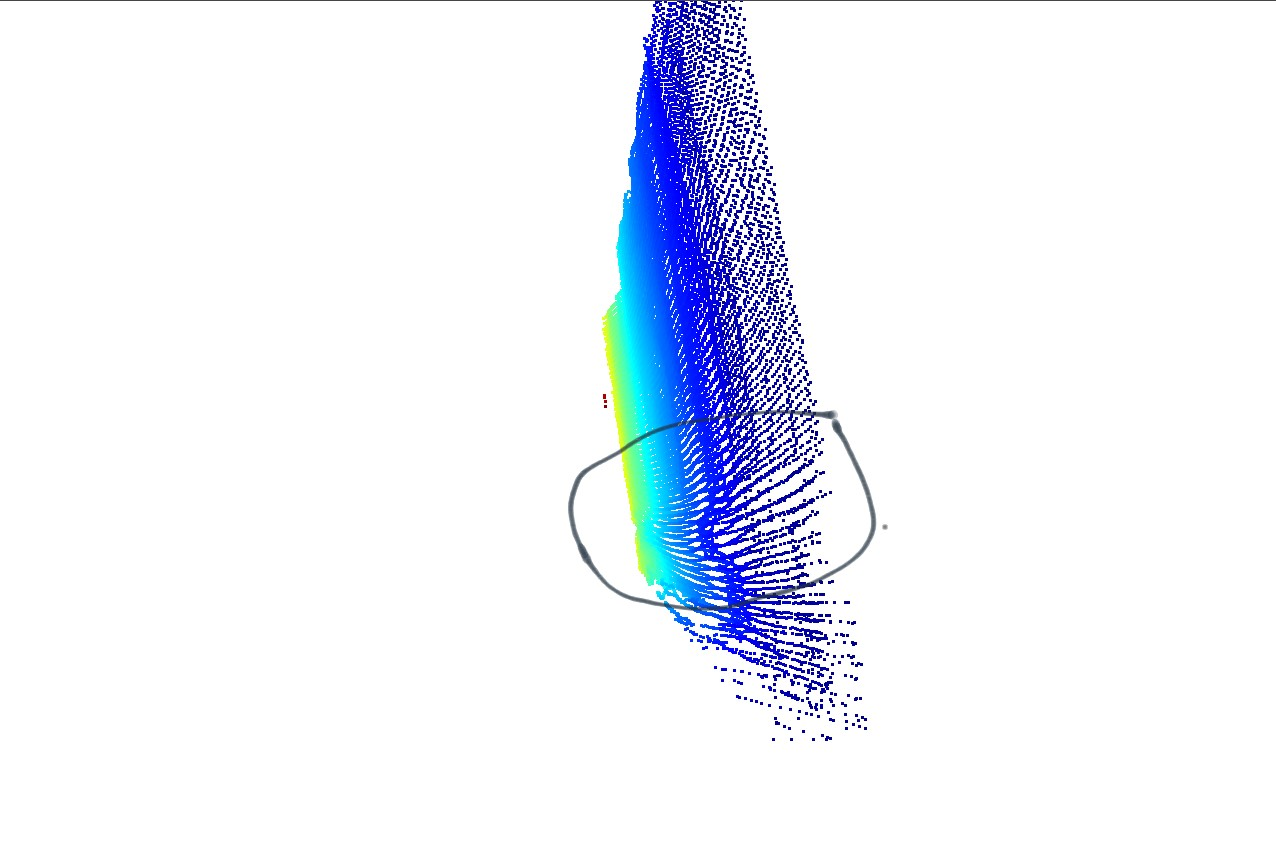

For further analysis I have attempted to calculate the estimated surface area of the wall. After careful consideration I decided to use the 5.9-6.1 range for selecting the wall coordinates. After that, I calculated the largest and smallest Y and Z coordinates to get the estimated height and width of the wall, then simply multiplied them, and came to the conclusion that a surface of the wall is around 11 m2. Note, this is a really broad estimatation.


In [7]:
height = df_wall_coordinates['Point_Z'].head(5).mean() - df_wall_coordinates['Point_Z'].tail(5).mean()
length = df_wall_coordinates['Point_Y'].nlargest(5).mean() - df_wall_coordinates['Point_Y'].nsmallest(5).mean()
estimated_wallsurface = round(height * length, 2)
print(estimated_wallsurface)



11.27


*******************************************

# 4 Analysing the cardboard cylinder

In [8]:
min_height = df_wall_coordinates['Point_Z'].tail(5).mean()
left_point = df_wall_coordinates['Point_Y'].nsmallest(5).mean()
right_point = df_wall_coordinates['Point_Y'].nlargest(5).mean()

df_cylinder = df[['Point_X', 'Point_Y', 'Point_Z']]
df_cylinder = df_cylinder[df['Point_Z'] < min_height + 1]
df_cylinder = df_cylinder[df['Point_Y'] > left_point + 5]
df_cylinder = df_cylinder[df['Point_Y'] < right_point + 0.45]
df_cylinder = df_cylinder[df['Point_X'] < 4.4]

Q1 = df_cylinder.quantile(0.25)
Q3 = df_cylinder.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_cylinder < (Q1 - 1.5 * IQR)) | (df_cylinder > (Q3 + 1.5 * IQR))).any(axis=1)
print(outliers.sum(), df_cylinder.count())

xyz = df_cylinder[['Point_X', 'Point_Y', 'Point_Z']].values
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)

vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)
vis.get_render_option().point_size = 8
vis.run()

vis.destroy_window()

C:\Users\User\AppData\Local\Temp\ipykernel_20036\4097779506.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cylinder = df_cylinder[df['Point_Y'] > left_point + 5]
C:\Users\User\AppData\Local\Temp\ipykernel_20036\4097779506.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cylinder = df_cylinder[df['Point_Y'] < right_point + 0.45]
C:\Users\User\AppData\Local\Temp\ipykernel_20036\4097779506.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cylinder = df_cylinder[df['Point_X'] < 4.4]


18 Point_X    358
Point_Y    358
Point_Z    358
dtype: int64


For analysing the cylinder I wanted to check how accurately the coordinates depict the object. My conclusion is, that if I narrow down the Y coordinates to 15cm (45cm from the left wall) the cylinder is nicely shown, only having 18 outlier coordinate points out of 358, most of them being in the front. This is shown below. Moreover, I have calculated the height and diameter of this point cloud dataset in the code down below, in this situation the height is 96cm (original: 100cm) and diameter is 11cm (original: 10cm)
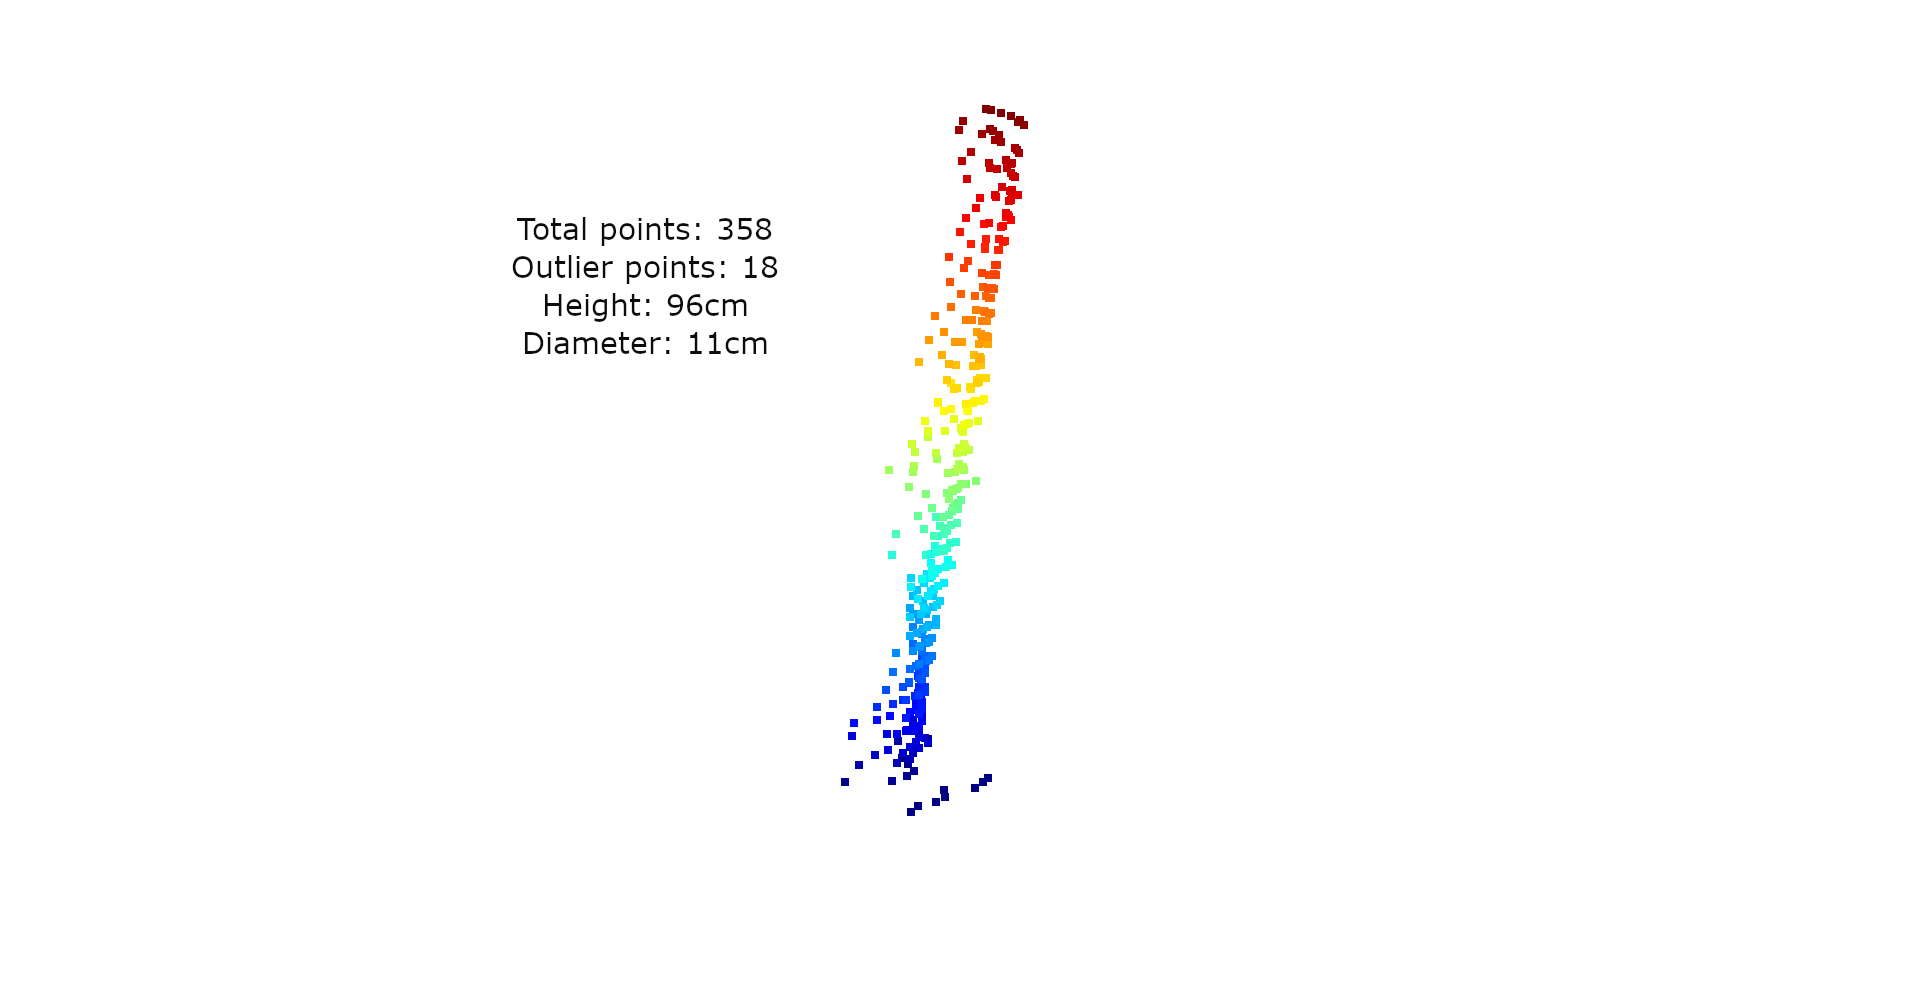

However, if I look at a sligthly larger range, a number of points suggests that the LiDAR did not catch all the points of the cylinder. The picture below depicts a view from the top, and the assumed off-points are highlighted. However, this is only a small number of coordinate points which did not influence my calculations about the height or the diameter of the cylinder. Therefore, my final conclusion is that the detection accuracy was high, and the number of possible incorrect coordinates is low.
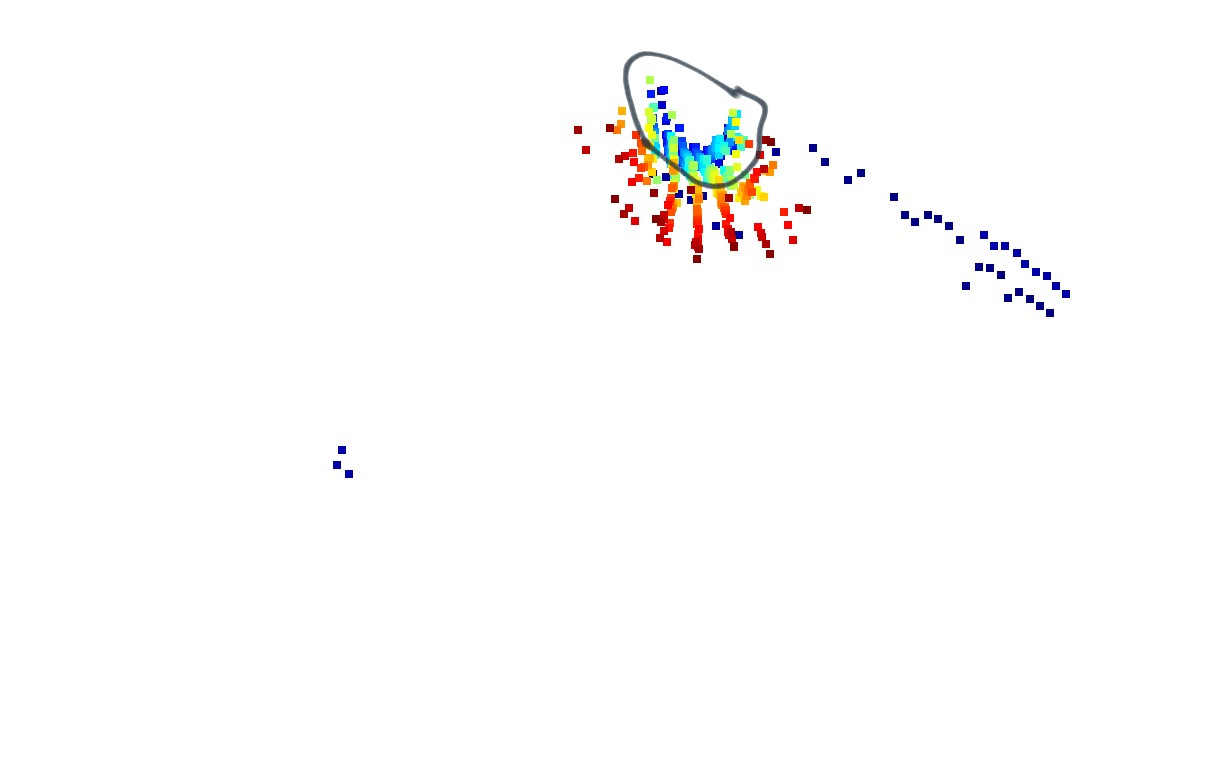

In [9]:
#calculating cylinder height and diameter
cylinder_height = df_cylinder['Point_Z'].head(5).mean() - df_cylinder['Point_Z'].tail(5).mean()
print(cylinder_height)
cylinder_diameter = df_cylinder['Point_X'].head(5).mean() - df_cylinder['Point_X'].tail(5).mean()
print(cylinder_diameter)

0.9627145888340727
0.11262670852458889
